In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from copy import deepcopy

The following functions compute sumsets and sumset sizes, of either real numbers (sum_set, sss2) or ordered pairs (sum_set_tup, sss).

In [ ]:
def sum_set_tup(A):
  ApA = set([])
  for (a,b) in A:
    for (c,d) in A:
      ApA.add((a+c,b+d))
  return list(ApA)

def sss(A):
  return len(sum_set_tup(A))

def sum_set(A):
  ApA = set([])
  for a in A:
    for b in A:
      ApA.add(a+b)
  return ApA

def sss2(A):
  return len(sum_set(A))

The following is an implementation of the 'WinnersSearch' algorithm described in the paper.

In [ ]:
def reflect_tuples(A):
    B = [(y, x) for (x, y) in A]
    B = sorted(B)
    return B

def sp_tree_tuples(A, Sd, Ss, used, t, K, M,winners):
    for k in Sd.keys():
        if k >= t:
            for x in Sd[k]:
              if x not in A:
                Ac = deepcopy(A)
                Sdc = deepcopy(Sd)
                Ssc = deepcopy(Ss)
                usedc = deepcopy(used)
                tc = k
                Ac.append(x)
                Ac = sorted(Ac)
                if not (Ac in usedc) and not (reflect_tuples(Ac) in usedc):
                    usedc.append(Ac)
                    for y in Ac:
                        z = (x[0] + y[0], x[1] + y[1])

                        if z not in Ssc:
                         Ssc.add(z)
                         q = z[0] + z[1]
                         if q in Sdc.keys():
                          Sdc[q].add(z)
                         else: Sdc[q] = {z}
                    T = len(Ssc)
                    j = len(Ac)
                    if j == K:
                      if T<= M and Ac not in winners and reflect_tuples(Ac) not in winners:
                        winners.append(Ac)
                    else:
                      if T <= M:
                        sp_tree_tuples(Ac, Sdc, Ssc, usedc, tc, K, M,winners)

def WinnersSearch(K,M):
  start = time.time()
  A = [(0, 0), (1, 0), (0, 1)]
  Sd = {0: {(0, 0)}, 1: {(1, 0), (0, 1)}, 2: {(2, 0), (1, 1), (0, 2)}}
  used = [A]
  winners = []
  Ss = set([(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (0, 2)])
  sp_tree_tuples(A, Sd, Ss, used, 2, K, M, winners)
  end = time.time()
  print('Total time elapsed (in sec.):', round(end - start,2))
  return winners

The following auxiliary functions allow us to choose similarity class representatives that are 'wider horizontally', for consistency.

In [ ]:
def horiz(L):
  m_max = max([m for (m,n) in L])
  n_max = max([n for (m,n) in L])
  if m_max >= n_max:
    return True
  else:
    return False

def horiz_list(lists):
  new_lists = []
  for L in lists:
    if horiz(L):
      new_lists.append(L)
    else:
      new_lists.append(reflect_tuples(L))
  return new_lists

From Freiman's classification, we know that sets of size $8$ with at most $21$ sums are either contained in an AP or of the form $(7,1),(6,2),(5,3)$ or $(4,4)$. For the latter group, we do a brute force search of ways to add elements to these sets while maintaining at most $25$ sums.

In [ ]:
Eights = [[(0,0),(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(0,1)], [(0,0),(1,0),(2,0),(3,0),(4,0),(5,0),(0,1),(1,1)],
 [(0,0),(1,0),(2,0),(3,0),(4,0),(0,1),(1,1),(2,1)], [(0,0),(1,0),(2,0),(3,0),(0,1),(1,1),(2,1),(3,1)]]

In [ ]:
Nines1 = []
for L in Eights:
  for i in range(-20,20):
    for j in range(-20,20):
      if (i,j) not in sum_set_tup(L):
        M = L+[(i,j)]
        if sss(M) <= 25:
          Nines1.append(M)
Nines1 = horiz_list(Nines1)

In [ ]:
len(Nines1)

10

We combine these "$8+1$" sets to those collected by WinnersSearch(9,25) to get a complete list.

In [ ]:
Nines2 = horiz_list(WinnersSearch(9,25))

Total time elapsed (in sec.): 5.96


In [ ]:
Nines_total = Nines1+Nines2

We display them to classify up to similarity.

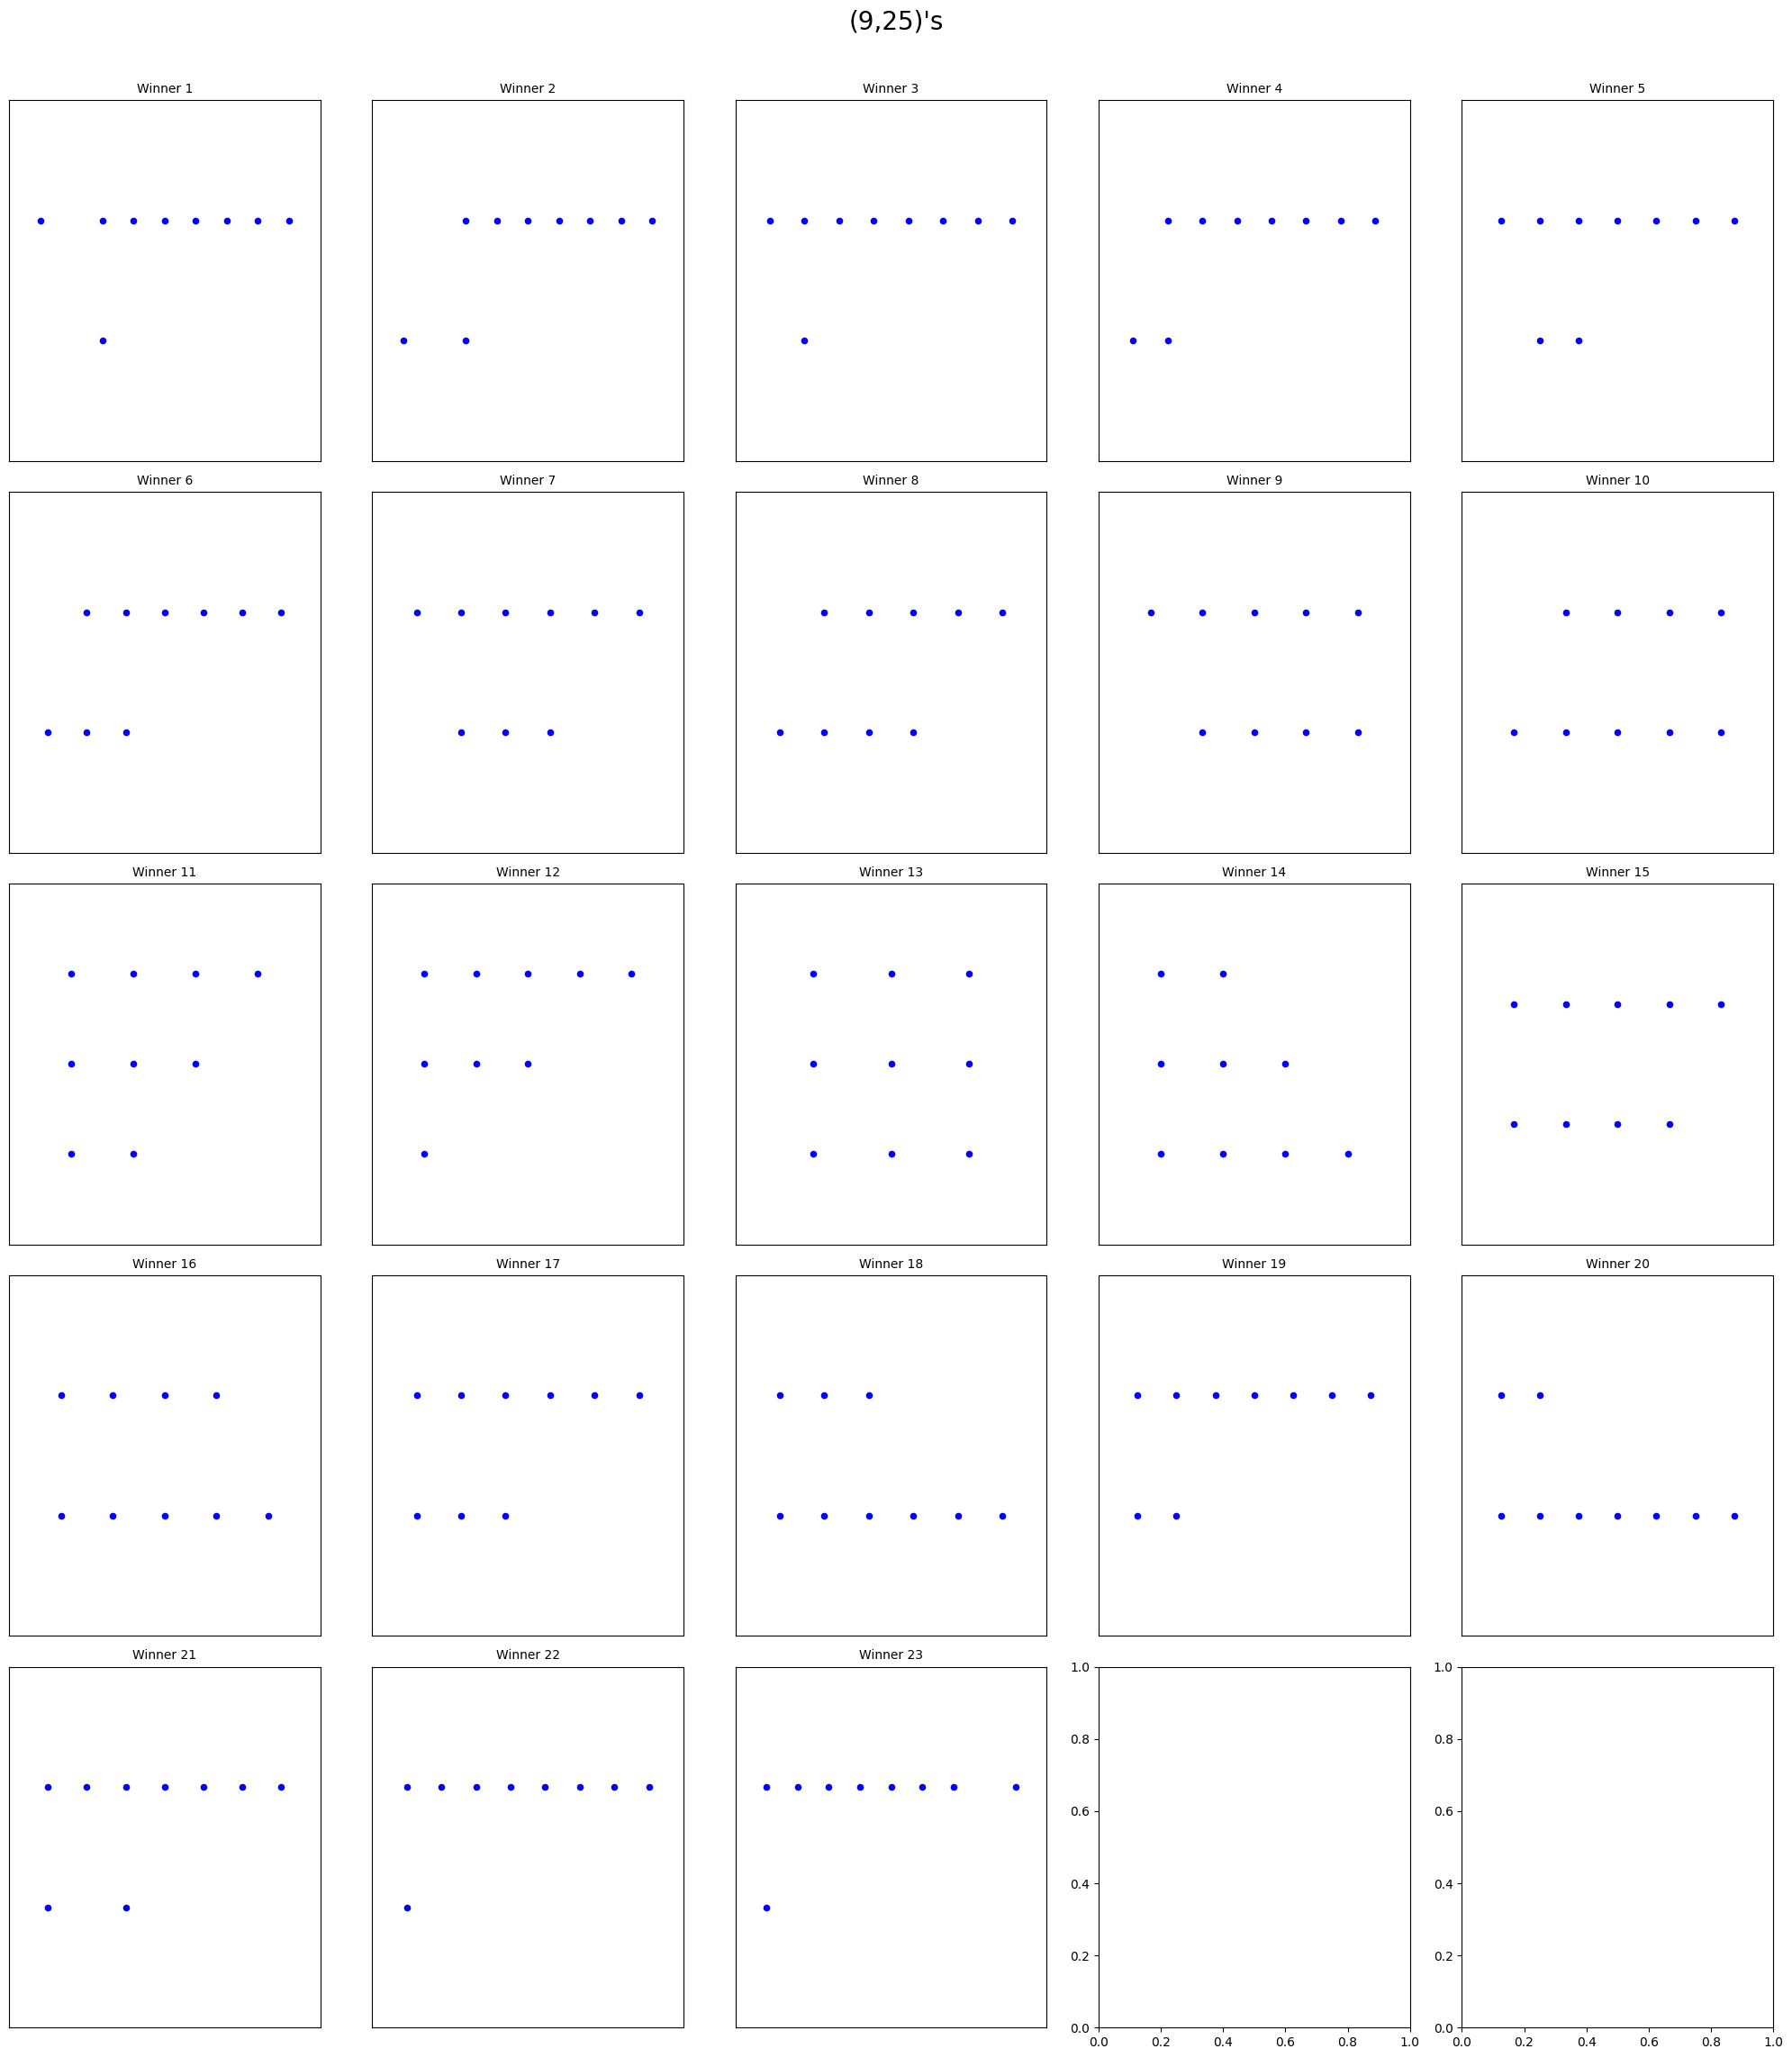

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(20,24))
fig.suptitle("(9,25)'s", fontsize=20)

for i, winner in enumerate(Nines_total):
    ax = axs[i // 5, i % 5]
    x_vals = [t[0] for t in winner]
    y_vals = [t[1] for t in winner]
    ax.scatter(x_vals, y_vals, c='blue', s=20)
    ax.set_title(f"Winner {i+1}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(min(x_vals, default=0) - 1, max(x_vals, default=1) + 1)
    ax.set_ylim(min(y_vals, default=0) - 1, max(y_vals, default=1) + 1)
    ax.invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

The following list has one representative from each similarity class of $9$-element sets with at most $25$ sums, with no 8 elements contained in a single AP, which are the forms $(7,2),(6,3),(5,4),(5,3,1),(4,3,2),(3,3,3), (7, 1\square 1)$.

In [ ]:
Nines = [[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (0, 1), (1, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (0, 1), (1, 1), (2, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (0, 1), (2, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (0, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2)],
 [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2)]]

We now climb from $(9,25)$ to $(10,29)$ in a similar way.

In [ ]:
Tens1 = []
for L in Nines:
  for i in range(-20,20):
    for j in range(-20,20):
      if (i,j) not in sum_set_tup(L):
        M = L+[(i,j)]
        if sss(M) <= 29:
          Tens1.append(M)
Tens1 = horiz_list(Tens1)

In [ ]:
len(Tens1)

29

In [ ]:
Tens2 = horiz_list(WinnersSearch(10,29))

Total time elapsed (in sec.): 25.33


In [ ]:
len(Tens2)

56

We display the output of WinnersSearch(10,29) separately from the '9+1' sets to potentially distinguish them in the classification, though it turns out every similarity class is represented in WinnersSearch(10,29).

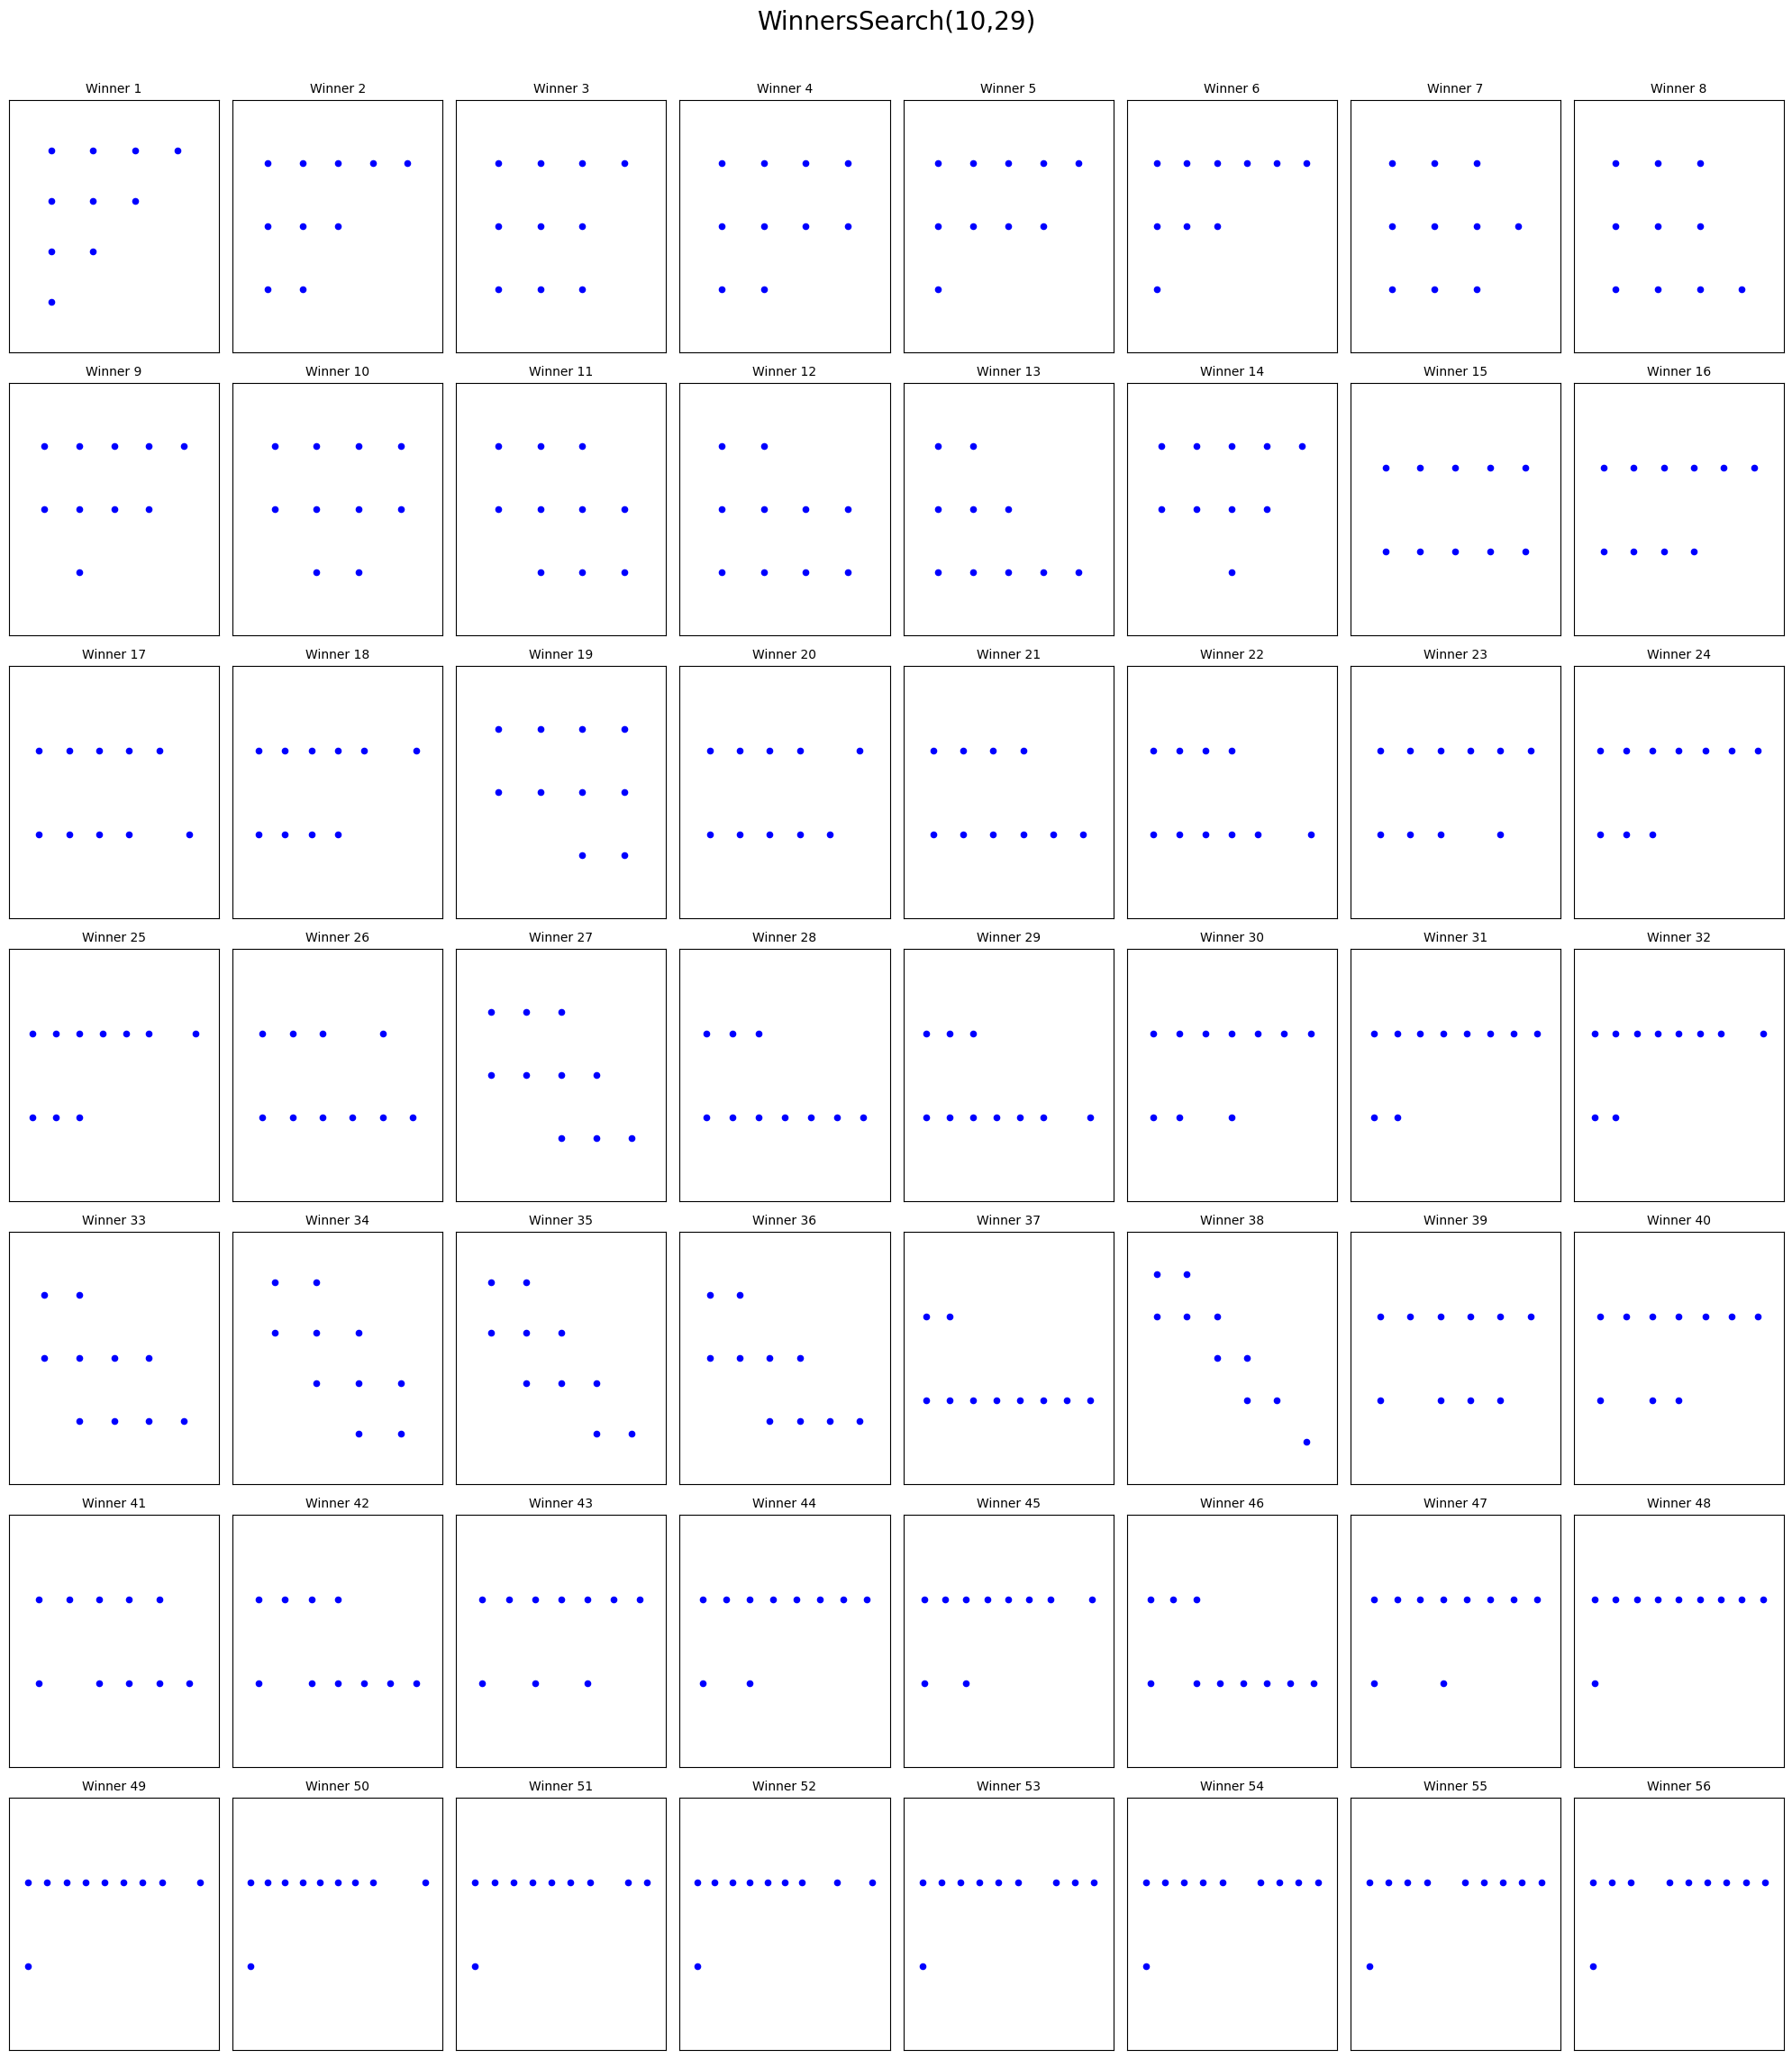

In [ ]:
fig, axs = plt.subplots(7, 8, figsize=(20,24))
fig.suptitle("WinnersSearch(10,29)", fontsize=20)

for i, winner in enumerate(Tens2):
    ax = axs[i // 8, i % 8]
    x_vals = [t[0] for t in winner]
    y_vals = [t[1] for t in winner]
    ax.scatter(x_vals, y_vals, c='blue', s=20)
    ax.set_title(f"Winner {i+1}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(min(x_vals, default=0) - 1, max(x_vals, default=1) + 1)
    ax.set_ylim(min(y_vals, default=0) - 1, max(y_vals, default=1) + 1)
    ax.invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

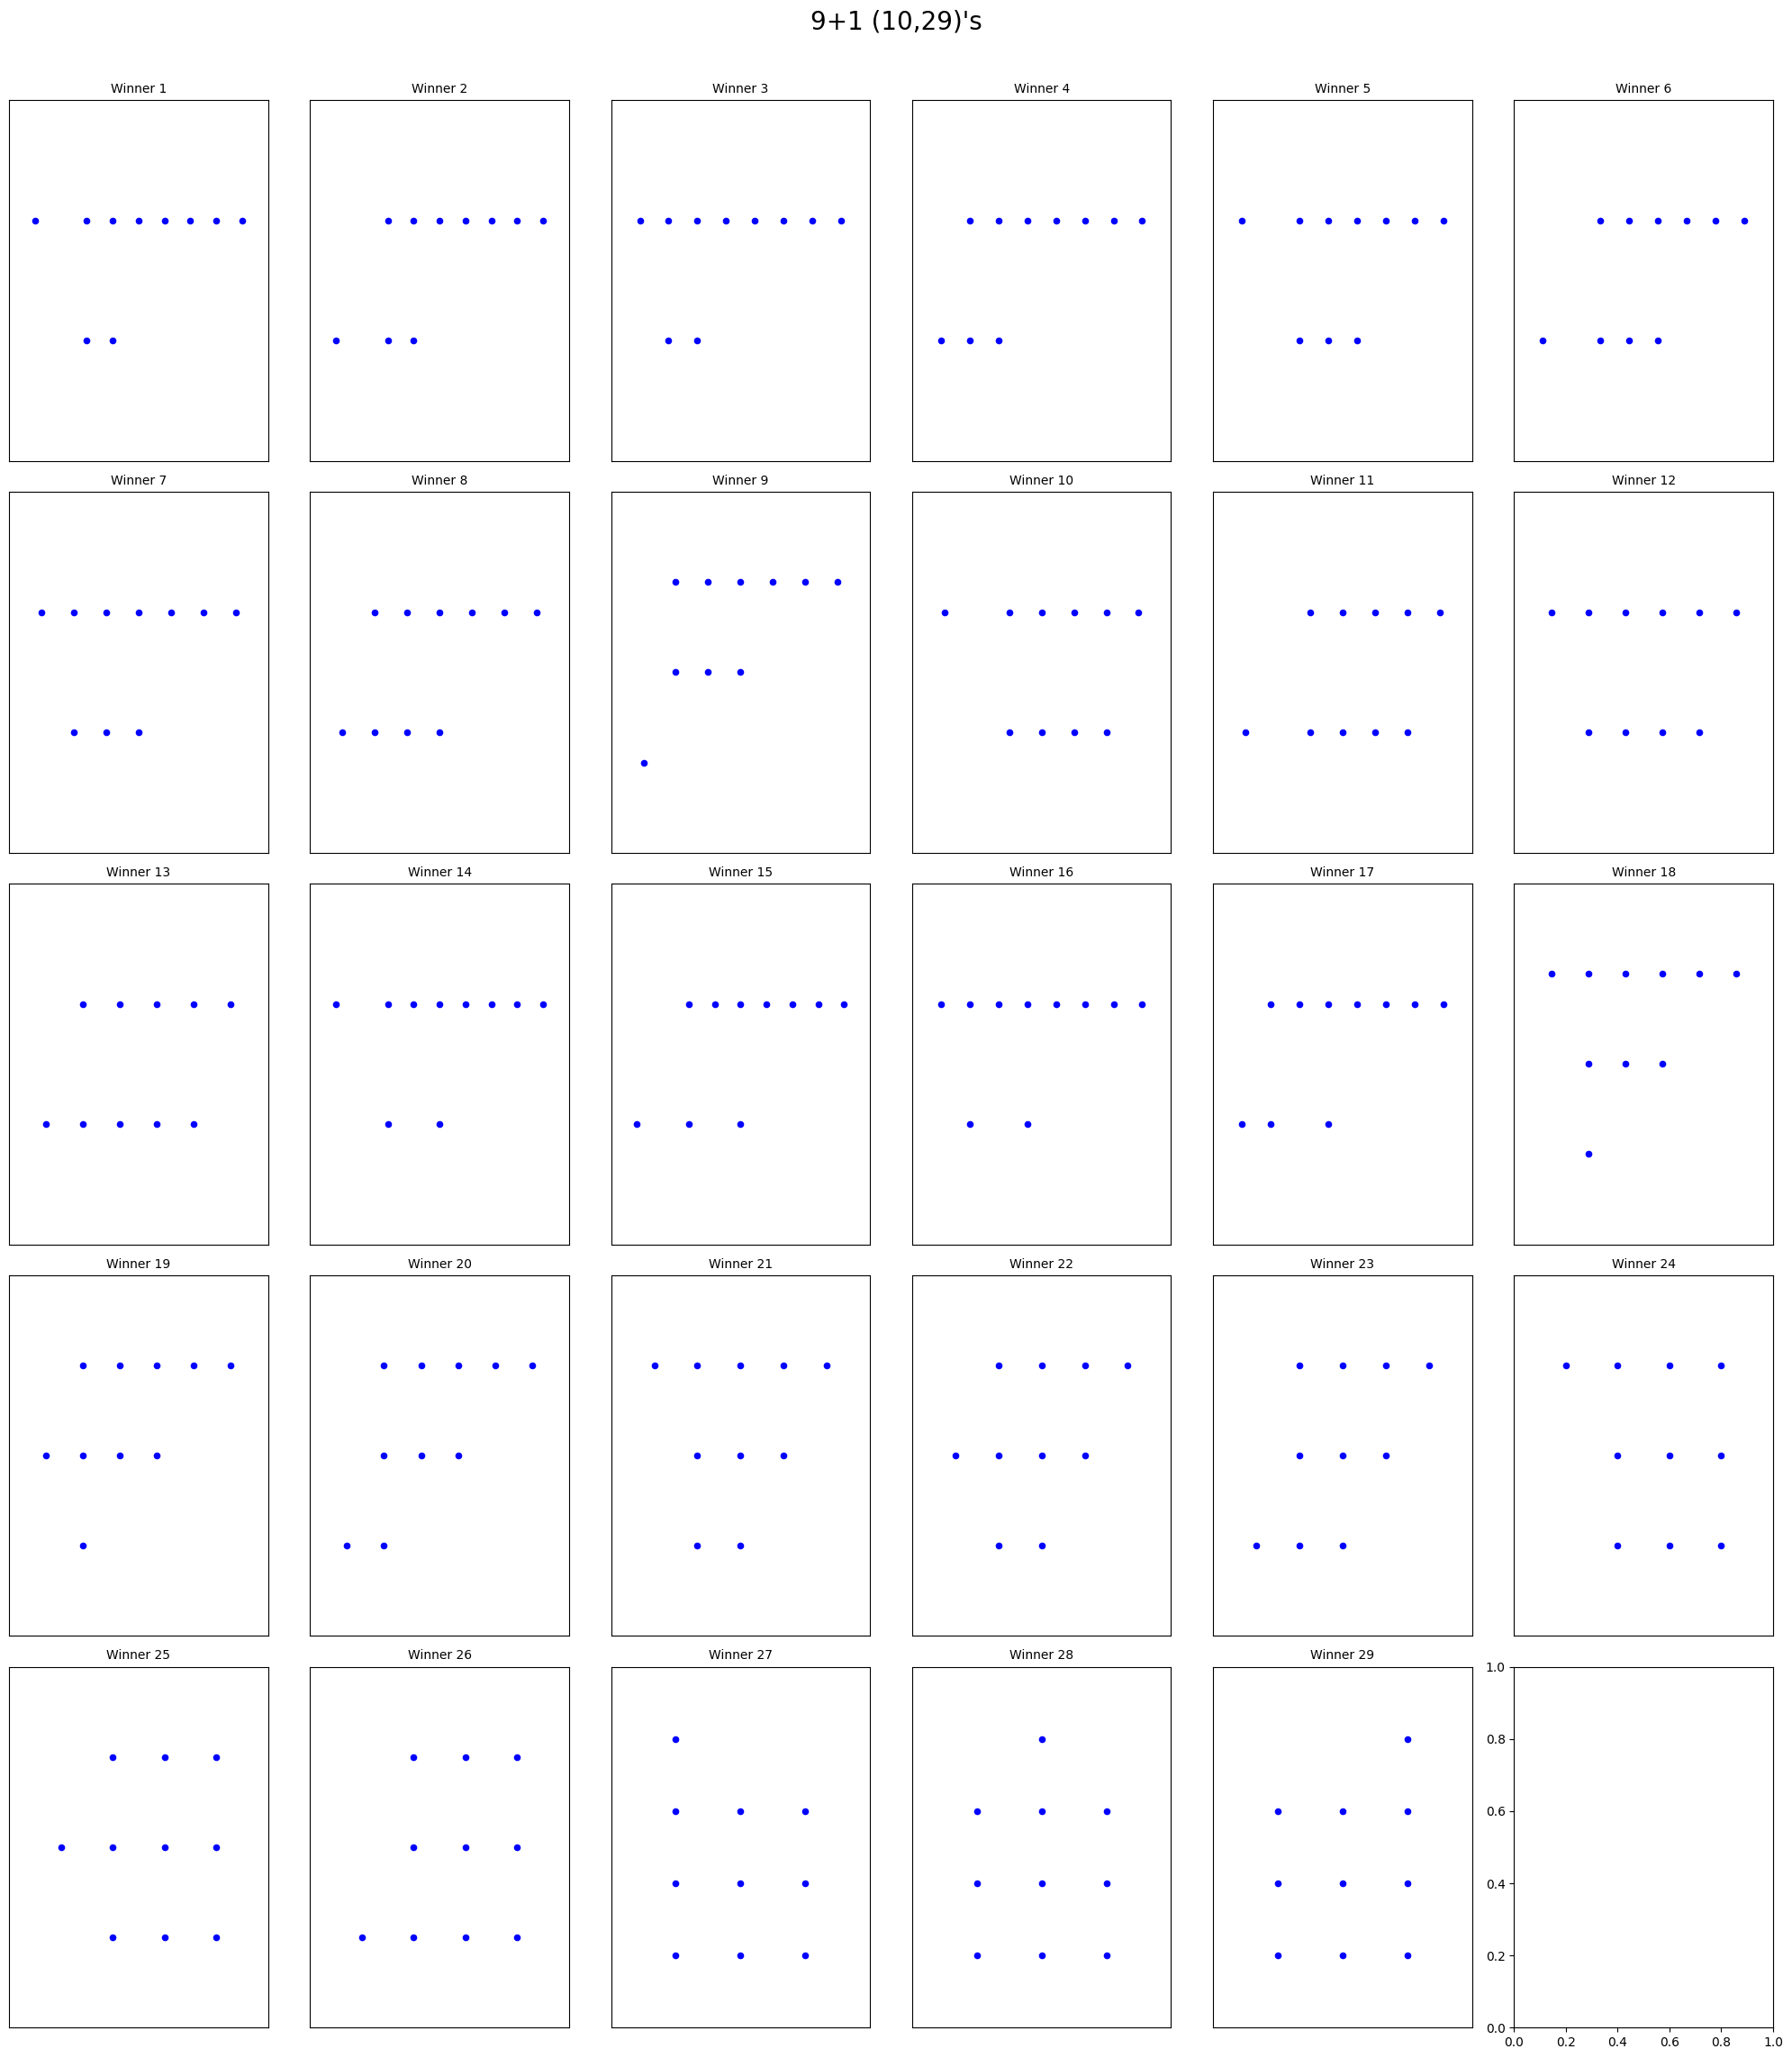

In [ ]:
fig, axs = plt.subplots(5, 6, figsize=(20,24))
fig.suptitle("9+1 (10,29)'s", fontsize=20)

for i, winner in enumerate(Tens1):
    ax = axs[i // 6, i % 6]
    x_vals = [t[0] for t in winner]
    y_vals = [t[1] for t in winner]
    ax.scatter(x_vals, y_vals, c='blue', s=20)
    ax.set_title(f"Winner {i+1}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(min(x_vals, default=0) - 1, max(x_vals, default=1) + 1)
    ax.set_ylim(min(y_vals, default=0) - 1, max(y_vals, default=1) + 1)
    ax.invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

The following is a list of one representative of each of the $19$ similarity classes of $10$-element sets determining at most $29$ elements, without $8$ elements contained in a single AP, which are the forms $(7,3),(6,4),(5,5),(6,3,1),(5,4,1),(5,3,2),(4,4,2),(4,3,3),(3,4,3),(4,3,2,1),(7,2\square1), (6,3\square1), (5,4\square1), (4,5\square 1), (3,6\square 1), (5,4,\square1),  (4,4,\square2), (3,4,\square3), (7,1\square 1 \square 1)$

In [ ]:
Tens = [[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (0, 1), (1, 1), (2, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (0, 1), (1, 1), (3, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (0, 1), (1, 1), (2, 1), (4, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (5, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1)],
 [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (7, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (0, 1), (2, 1), (4, 1)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (0, 1), (1, 1), (2, 1), (0, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (0, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2)],
 [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2), (2, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (1, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (1, 2), (2, 2)],
 [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (3, 2)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]    ]

Displayed for clarity, and to see that all contain at least $9$ elements of $\{(m,n):0\leq m\leq 7, n\in \{0,1\}\}$ or at least $9$ elements of $\{(m,n): 0\leq m \leq 3, 0\leq n \leq 2\}$.

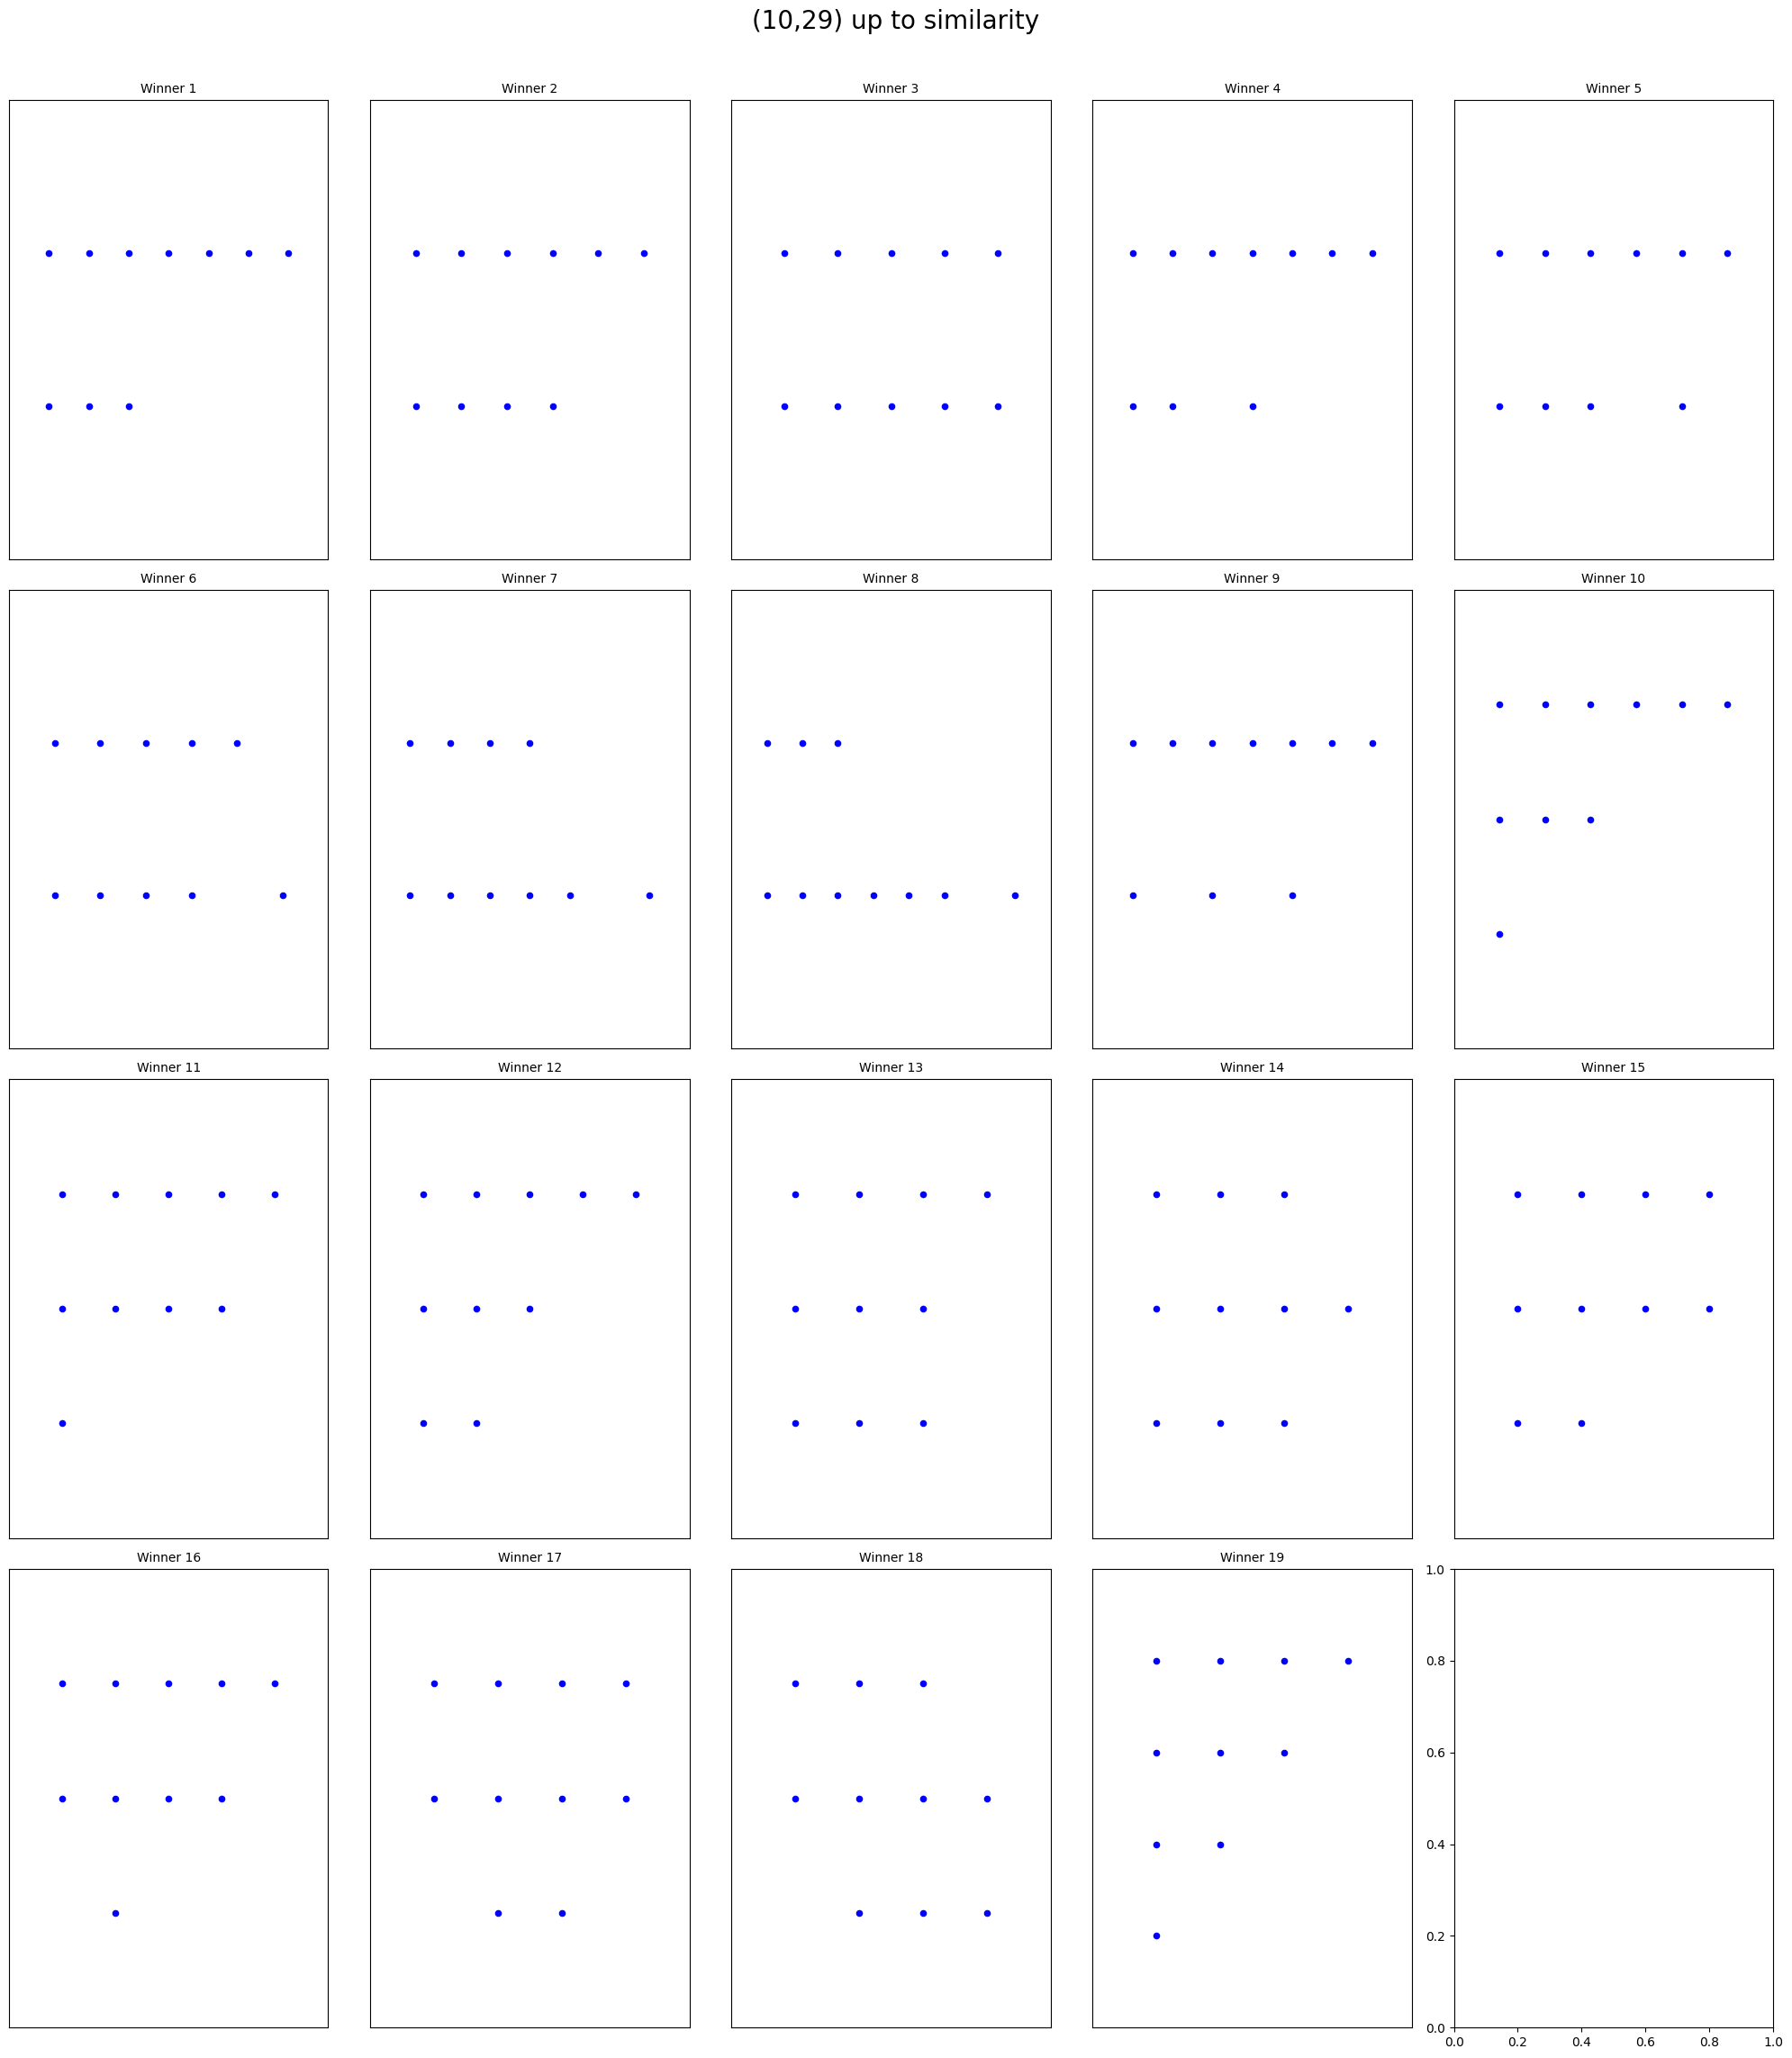

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(20,24))
fig.suptitle("(10,29) up to similarity", fontsize=20)

for i, winner in enumerate(Tens):
    ax = axs[i // 5, i % 5]
    x_vals = [t[0] for t in winner]
    y_vals = [t[1] for t in winner]
    ax.scatter(x_vals, y_vals, c='blue', s=20)
    ax.set_title(f"Winner {i+1}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(min(x_vals, default=0) - 1, max(x_vals, default=1) + 1)
    ax.set_ylim(min(y_vals, default=0) - 1, max(y_vals, default=1) + 1)
    ax.invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Lastly, we jump to $(11,33)$.

In [ ]:
Elevens1 = []
for L in Tens:
  for i in range(-20,20):
    for j in range(-20,20):
      if (i,j) not in sum_set_tup(L):
        M = L+[(i,j)]
        if sss(M) <= 33:
          Elevens1.append(M)
Elevens1 = horiz_list(Elevens1)

In [ ]:
len(Elevens1)

71

In [ ]:
Elevens2 = horiz_list(WinnersSearch(11,33))

Total time elapsed (in sec.): 179.99


In [ ]:
len(Elevens2)

159

We don't attempt a complete classification for $(11,33)$, and we only need to display Elevens2 to check that they are all similar to a set containing at least $9$ elements of $\{(m,n):0\leq m\leq 7, n\in \{0,1\}\}$ or at least $9$ elements of $\{(m,n): 0\leq m \leq 3, 0\leq n \leq 2\}$ (or contain at least $8$ elements of a single AP), and they are! We don't need to check Elevens1 because they all came from adding an element to as set that already had this property.

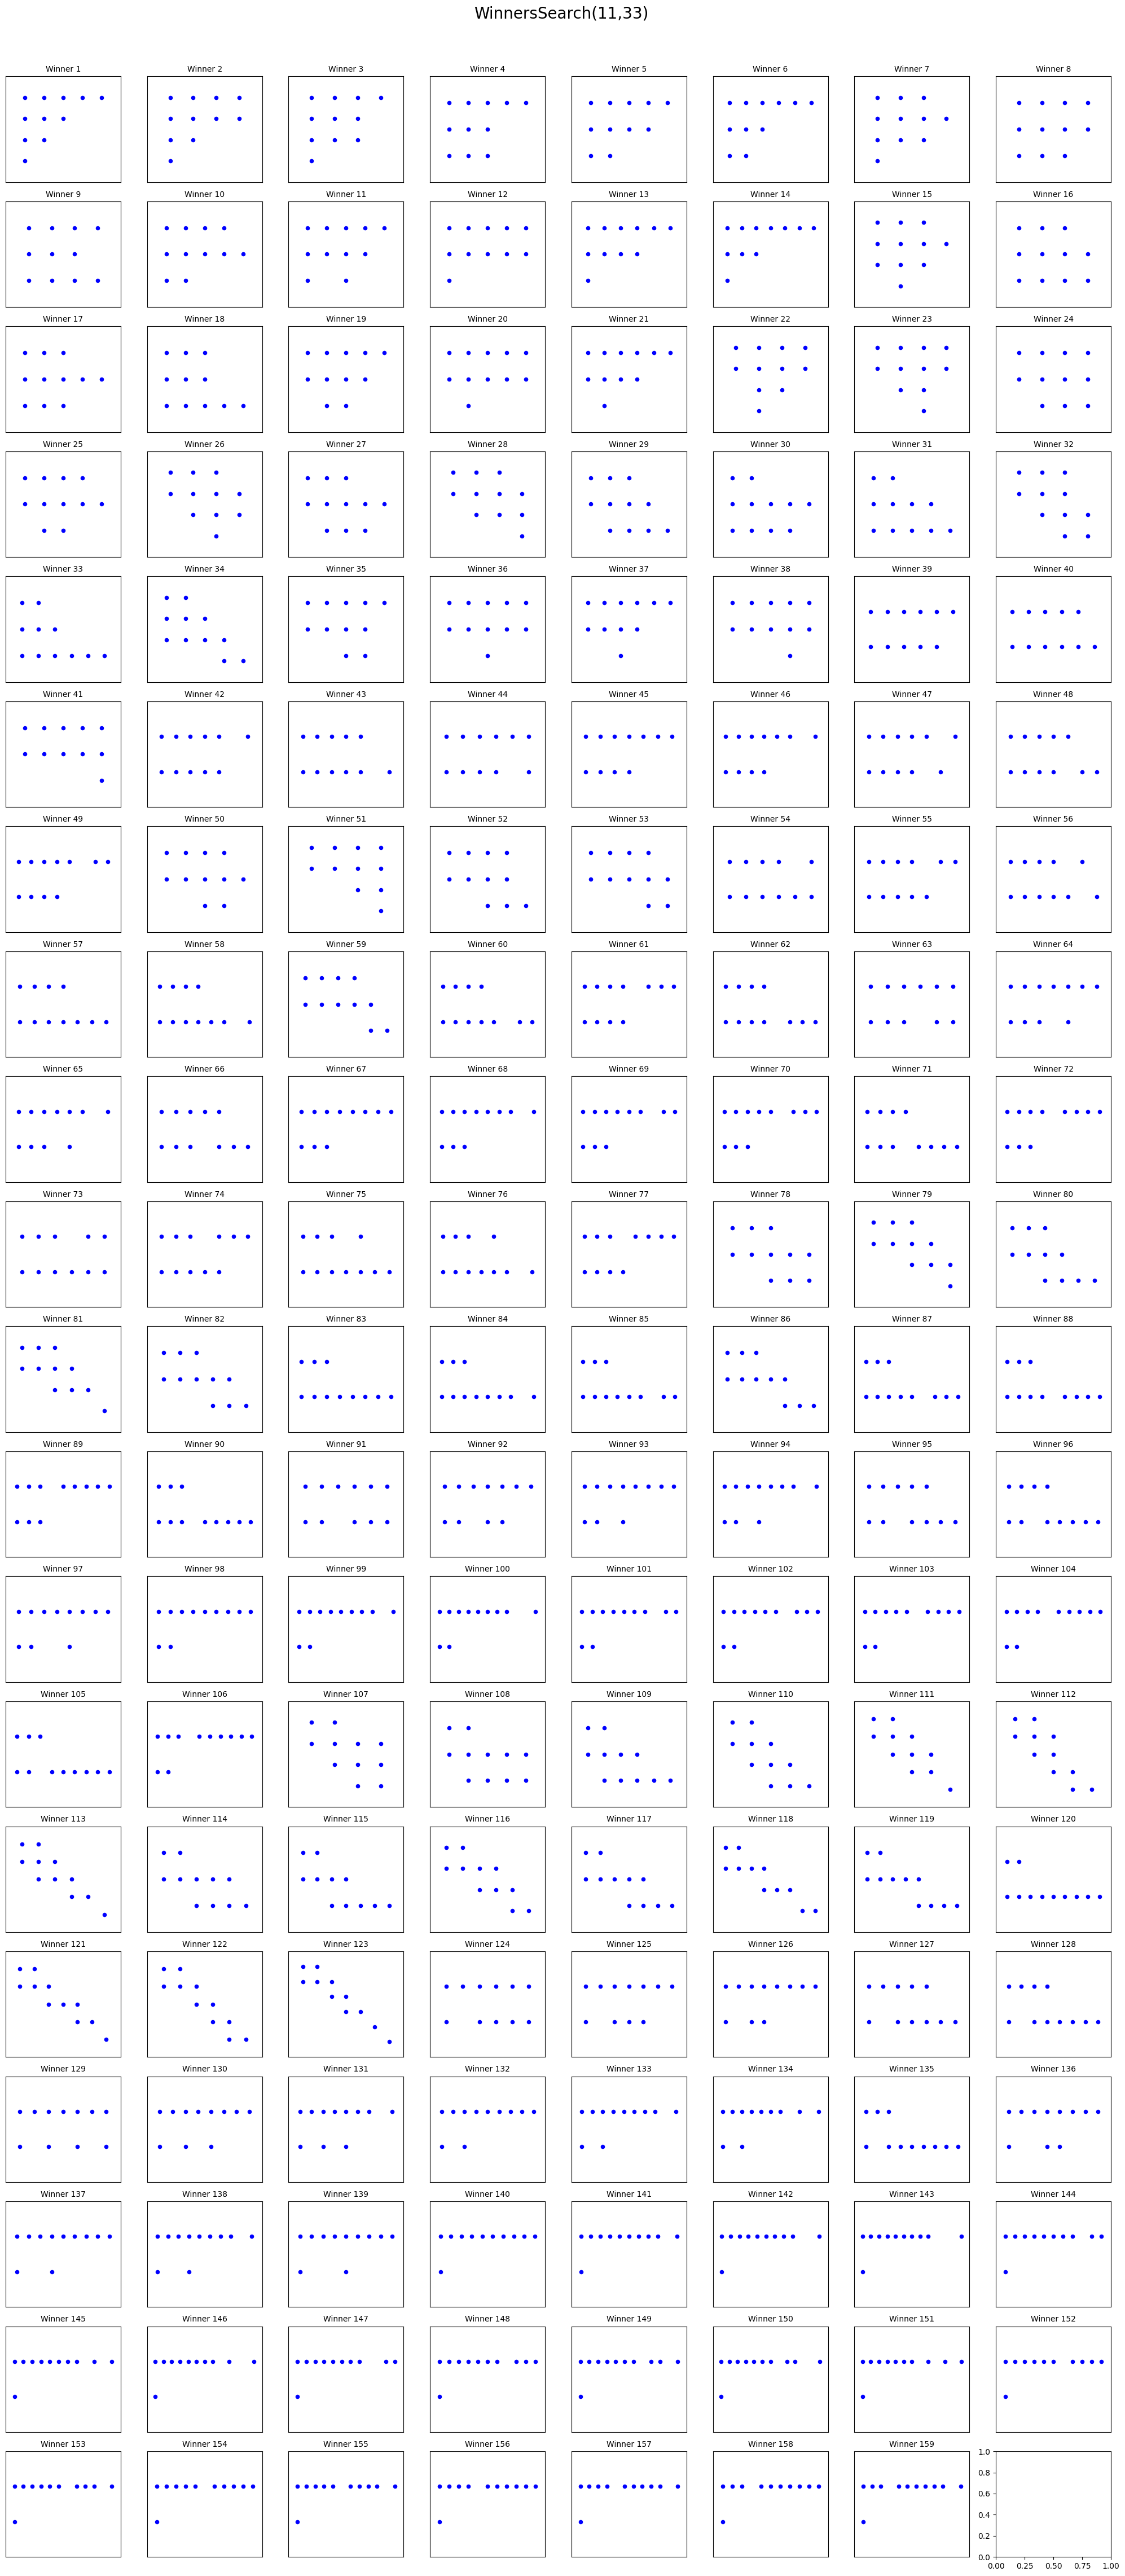

In [ ]:
fig, axs = plt.subplots(20, 8, figsize=(20,48))
fig.suptitle("WinnersSearch(11,33)", fontsize=20)

for i, winner in enumerate(Elevens2):
    ax = axs[i // 8, i % 8]
    x_vals = [t[0] for t in winner]
    y_vals = [t[1] for t in winner]
    ax.scatter(x_vals, y_vals, c='blue', s=20)
    ax.set_title(f"Winner {i+1}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(min(x_vals, default=0) - 1, max(x_vals, default=1) + 1)
    ax.set_ylim(min(y_vals, default=0) - 1, max(y_vals, default=1) + 1)
    ax.invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Now we bring in the list of exceptional $(r,s)$ pairs found in our collision control section.

In [ ]:
Two_row_exc = [(1/2, 1/24),
 (1/2, 1/12),
 (1/2, 3/32),
 (1/2, 1/10),
 (1/2, 1/6),
 (1/2, 3/16),
 (1/2, 1/5),
 (1/2, 5/16),
 (1/2, 1/3),
 (1/2, 3/8),
 (1/2, 2/5),
 (1/2, 7/16),
 (1/2, 9/16),
 (1/2, 5/8),
 (1/2, 2/3),
 (1/2, 3/4),
 (1/2, 4/5),
 (1/2, 7/8),
 (1/2, 8/9),
 (1/2, 15/16),
 (1/2, 17/16),
 (1/2, 9/8),
 (1/2, 5/4),
 (1/2, 4/3),
 (1/2, 3/2),
 (1/2, 8/5),
 (1/2, 7/4),
 (1/2, 15/8),
 (1/2, 31/16),
 (1/2, 17/8),
 (1/2, 9/4),
 (1/2, 5/2),
 (1/2, 8/3),
 (1/2, 3),
 (1/2, 16/5),
 (1/2, 7/2),
 (1/2, 15/4),
 (1/2, 31/8),
 (1/2, 17/4),
 (1/2, 9/2),
 (1/2, 5),
 (1/2, 16/3),
 (1/2, 6),
 (1/2, 7),
 (1/2, 15/2),
 (1/2, 31/4),
 (1/2, 17/2),
 (1/2, 9),
 (1/2, 10),
 (1/2, 32/3),
 (1/2, 12),
 (1/2, 14),
 (1/2, 15),
 (1/2, 31/2),
 (1/2, 18),
 (1/2, 20),
 (1/2, 64/3),
 (1/2, 24),
 (1/2, 28),
 (1/2, 30),
 (1/2, 40),
 (1/2, 128/3),
 (1/2, 48),
 (1/2, 56),
 (1/2, 96),
 (2/3, 4/41),
 (2/3, 4/27),
 (2/3, 2/9),
 (2/3, 1/3),
 (2/3, 17/43),
 (2/3, 1/2),
 (2/3, 16/27),
 (2/3, 3/4),
 (2/3, 8/9),
 (2/3, 9/8),
 (2/3, 4/3),
 (2/3, 27/16),
 (2/3, 2),
 (2/3, 81/32),
 (2/3, 3),
 (2/3, 9/2),
 (2/3, 27/4),
 (2/3, 81/8),
 (3/2, 4/41),
 (3/2, 4/27),
 (3/2, 2/9),
 (3/2, 1/3),
 (3/2, 17/43),
 (3/2, 1/2),
 (3/2, 16/27),
 (3/2, 3/4),
 (3/2, 8/9),
 (3/2, 9/8),
 (3/2, 4/3),
 (3/2, 27/16),
 (3/2, 2),
 (3/2, 81/32),
 (3/2, 3),
 (3/2, 9/2),
 (3/2, 27/4),
 (3/2, 81/8),
 (2, 1/50),
 (2, 1/48),
 (2, 1/43),
 (2, 1/24),
 (2, 2/43),
 (2, 1/20),
 (2, 3/38),
 (2, 1/12),
 (2, 3/32),
 (2, 1/10),
 (2, 5/46),
 (2, 1/9),
 (2, 5/32),
 (2, 1/6),
 (2, 3/16),
 (2, 1/5),
 (2, 7/32),
 (2, 9/32),
 (2, 5/16),
 (2, 1/3),
 (2, 3/8),
 (2, 2/5),
 (2, 7/16),
 (2, 15/32),
 (2, 9/16),
 (2, 5/8),
 (2, 2/3),
 (2, 3/4),
 (2, 4/5),
 (2, 7/8),
 (2, 15/16),
 (2, 17/16),
 (2, 9/8),
 (2, 5/4),
 (2, 4/3),
 (2, 3/2),
 (2, 8/5),
 (2, 7/4),
 (2, 15/8),
 (2, 31/16),
 (2, 17/8),
 (2, 9/4),
 (2, 5/2),
 (2, 8/3),
 (2, 3),
 (2, 7/2),
 (2, 15/4),
 (2, 31/8),
 (2, 17/4),
 (2, 9/2),
 (2, 5),
 (2, 16/3),
 (2, 6),
 (2, 7),
 (2, 15/2),
 (2, 31/4),
 (2, 63/8),
 (2, 17/2),
 (2, 9),
 (2, 10),
 (2, 32/3),
 (2, 12),
 (2, 14),
 (2, 15),
 (2, 31/2),
 (2, 63/4),
 (2, 17),
 (2, 18),
 (2, 20),
 (2, 24),
 (2, 28),
 (2, 30),
 (2, 31),
 (2, 63/2),
 (2, 56),
 (2, 60),
 (2, 62),
 (2, 63)
]

Three_row_exc= [(5/4, 6/5),
 (5/4, 3/2),
 (5/4, 8/5),
 (5/4, 2),
 (5/4, 5/2),
 (4/3, 9/8),
 (4/3, 8/7),
 (4/3, 7/6),
 (4/3, 3/2),
 (4/3, 2),
 (4/3, 8/3),
 (3/2, 9/8),
 (3/2, 6/5),
 (3/2, 5/4),
 (3/2, 4/3),
 (3/2, 2),
 (3/2, 8/3),
 (3/2, 3),
 (3/2, 4),
 (3/2, 9/2),
 (3/2, 6),
 (5/3, 7/5),
 (5/3, 9/5),
 (5/3, 7/3),
 (5/3, 3),
 (5/3, 5),
 (9/5, 5/3),
 (9/5, 3),
 (9/5, 27/5),
 (2, 9/8),
 (2, 8/7),
 (2, 5/4),
 (2, 4/3),
 (2, 3/2),
 (2, 8/5),
 (2, 7/4),
 (2, 2),
 (2, 9/4),
 (2, 5/2),
 (2, 8/3),
 (2, 3),
 (2, 7/2),
 (2, 9/2),
 (2, 5),
 (2, 6),
 (2, 7),
 (5/2, 5/4),
 (5/2, 8/5),
 (5/2, 2),
 (5/2, 4),
 (5/2, 5),
 (5/2, 10),
 (3, 4/3),
 (3, 3/2),
 (3, 5/3),
 (3, 9/5),
 (3, 2),
 (3, 4),
 (3, 9/2),
 (3, 5),
 (3, 27/5),
 (3, 6),
 (3, 15),
 (4, 3/2),
 (4, 8/5),
 (4, 7/4),
 (4, 5/2),
 (4, 8/3),
 (4, 6),
 (4, 7),
 (4, 10),
 (5, 5/3),
 (5, 9/5),
 (5, 3),
 (5, 9),
 (5, 15)]

Total_exc = Two_row_exc + Three_row_exc

We check the size of the sumset of $\{r^ms^n:(m,n)\in P\}$ for all stored $10$-element (resp. $11$-element) forms $P$, whenever $(r,s)$ or $(s,r)$ is an exceptional pair, keeping any set determining at most $30$ (resp. $33$) sums.

In [ ]:
SPwinners10 = []

for (r,s) in Total_exc:
  for P in Tens:
      A = [r**m*s**n for (m,n) in P]
      B = [s**m*r**n for (m,n) in P]
      if len(set(A))==10 and sss2(A) <= 30:
        SPwinners10.append(A)
        print(r,s,P)
      if len(set(B))==10 and sss2(B) <= 30:
        SPwinners10.append(B)
        print(r,s,P)

2 3 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2)]
2 3 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2)]
3 2 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2)]


In [ ]:
SPwinners10

[[1, 2, 4, 8, 16, 3, 6, 12, 9, 18],
 [1, 2, 4, 8, 16, 3, 6, 12, 9, 18],
 [1, 2, 4, 8, 16, 3, 6, 12, 9, 18]]

In [ ]:
SPwinners11 = []

for (r,s) in Total_exc:
  for P in Elevens1+Elevens2:
      A = [r**m*s**n for (m,n) in P]
      B = [s**m*r**n for (m,n) in P]
      if len(set(A))==11 and sss2(A) <= 34:
        SPwinners11.append(A)
        print(r,s,P)
      if len(set(B))==11 and sss2(B) <= 34:
        SPwinners11.append(B)
        print(r,s,P)

0.5 1.5 [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (4, 0)]
1.5 0.5 [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (4, 0)]
1.5 2 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (-1, 0)]
2 1.5 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (-1, 0)]
2 3 [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0)]
1.5 2 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (-1, 0)]
2 1.5 [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (-1, 0)]
2 3 [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0)]
3 2 [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0)]


In [ ]:
SPwinners11

[[1.0, 1.5, 0.5, 0.75, 1.125, 0.25, 0.375, 0.5625, 0.125, 0.1875, 0.0625],
 [1.0, 1.5, 0.5, 0.75, 1.125, 0.25, 0.375, 0.5625, 0.125, 0.1875, 0.0625],
 [1.0, 2.0, 4.0, 8.0, 1.5, 3.0, 6.0, 12.0, 4.5, 9.0, 0.5],
 [1.0, 2.0, 4.0, 8.0, 1.5, 3.0, 6.0, 12.0, 4.5, 9.0, 0.5],
 [1, 3, 9, 2, 6, 18, 4, 12, 8, 24, 16],
 [1.0, 2.0, 4.0, 8.0, 1.5, 3.0, 6.0, 12.0, 4.5, 9.0, 0.5],
 [1.0, 2.0, 4.0, 8.0, 1.5, 3.0, 6.0, 12.0, 4.5, 9.0, 0.5],
 [1, 3, 9, 2, 6, 18, 4, 12, 8, 24, 16],
 [1, 3, 9, 2, 6, 18, 4, 12, 8, 24, 16]]

All scalings of $\{1,2,3,4,6,8,9,12,16,18,24\}$ by $1,2,$ or $16$.